### Project Description

Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.

Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article.

Over period of few years Mashable has collected data on around 40,000 articles.

You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.


In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [328]:
df_log.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.863917,1.079181,2.340444,-0.178097,-3.340593e-09,-0.088637,0.602060,0.301030,0.00000,-inf,...,-0.421778,-1.000000,-0.154902,NaN,NaN,NaN,-0.301030,NaN,-inf,-0.726999
1,2.863917,0.954243,2.406540,-0.218429,-2.914550e-09,-0.101304,0.477121,0.000000,0.00000,-inf,...,-0.542247,-1.477121,-0.154902,NaN,NaN,NaN,-inf,-inf,-0.301030,-inf
2,2.863917,0.954243,2.324282,-0.240234,-3.649377e-09,-0.177920,0.477121,0.000000,0.00000,-inf,...,-0.304664,-1.000000,0.000000,NaN,NaN,NaN,-inf,-inf,-0.301030,-inf
3,2.863917,0.954243,2.725095,-0.297752,-1.344576e-09,-0.176764,0.954243,-inf,0.00000,-inf,...,-0.413452,-0.865301,-0.096910,NaN,NaN,NaN,-inf,-inf,-0.301030,-inf
4,2.863917,1.113943,3.030195,-0.381277,-6.232126e-10,-0.266891,1.278754,1.278754,1.30103,-inf,...,-0.386024,-1.477121,0.000000,NaN,NaN,NaN,-0.342423,-0.865301,-1.342423,-0.865301


In [329]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#### Descriptive Info of Data

In [330]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [332]:
df.iloc[:,0].nunique()

39644

As we can see here the first column is having 39644 unique values. so this column is not useul for us as this column in only contains the title of the Article. So we are removing that feature now.

In [333]:
df = df.drop('url',axis=1)

In [334]:
df.shape

(39644, 60)

###### Null Value Check

In [335]:
df.isna().sum()

timedelta                         0
n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
 data_channel_is_entertainment    0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                        0
self_reference_min_shares   

### Correlation Check For Input Parameters

In [336]:
df_corr = df.iloc[:,0:-1].corr()

<AxesSubplot:>

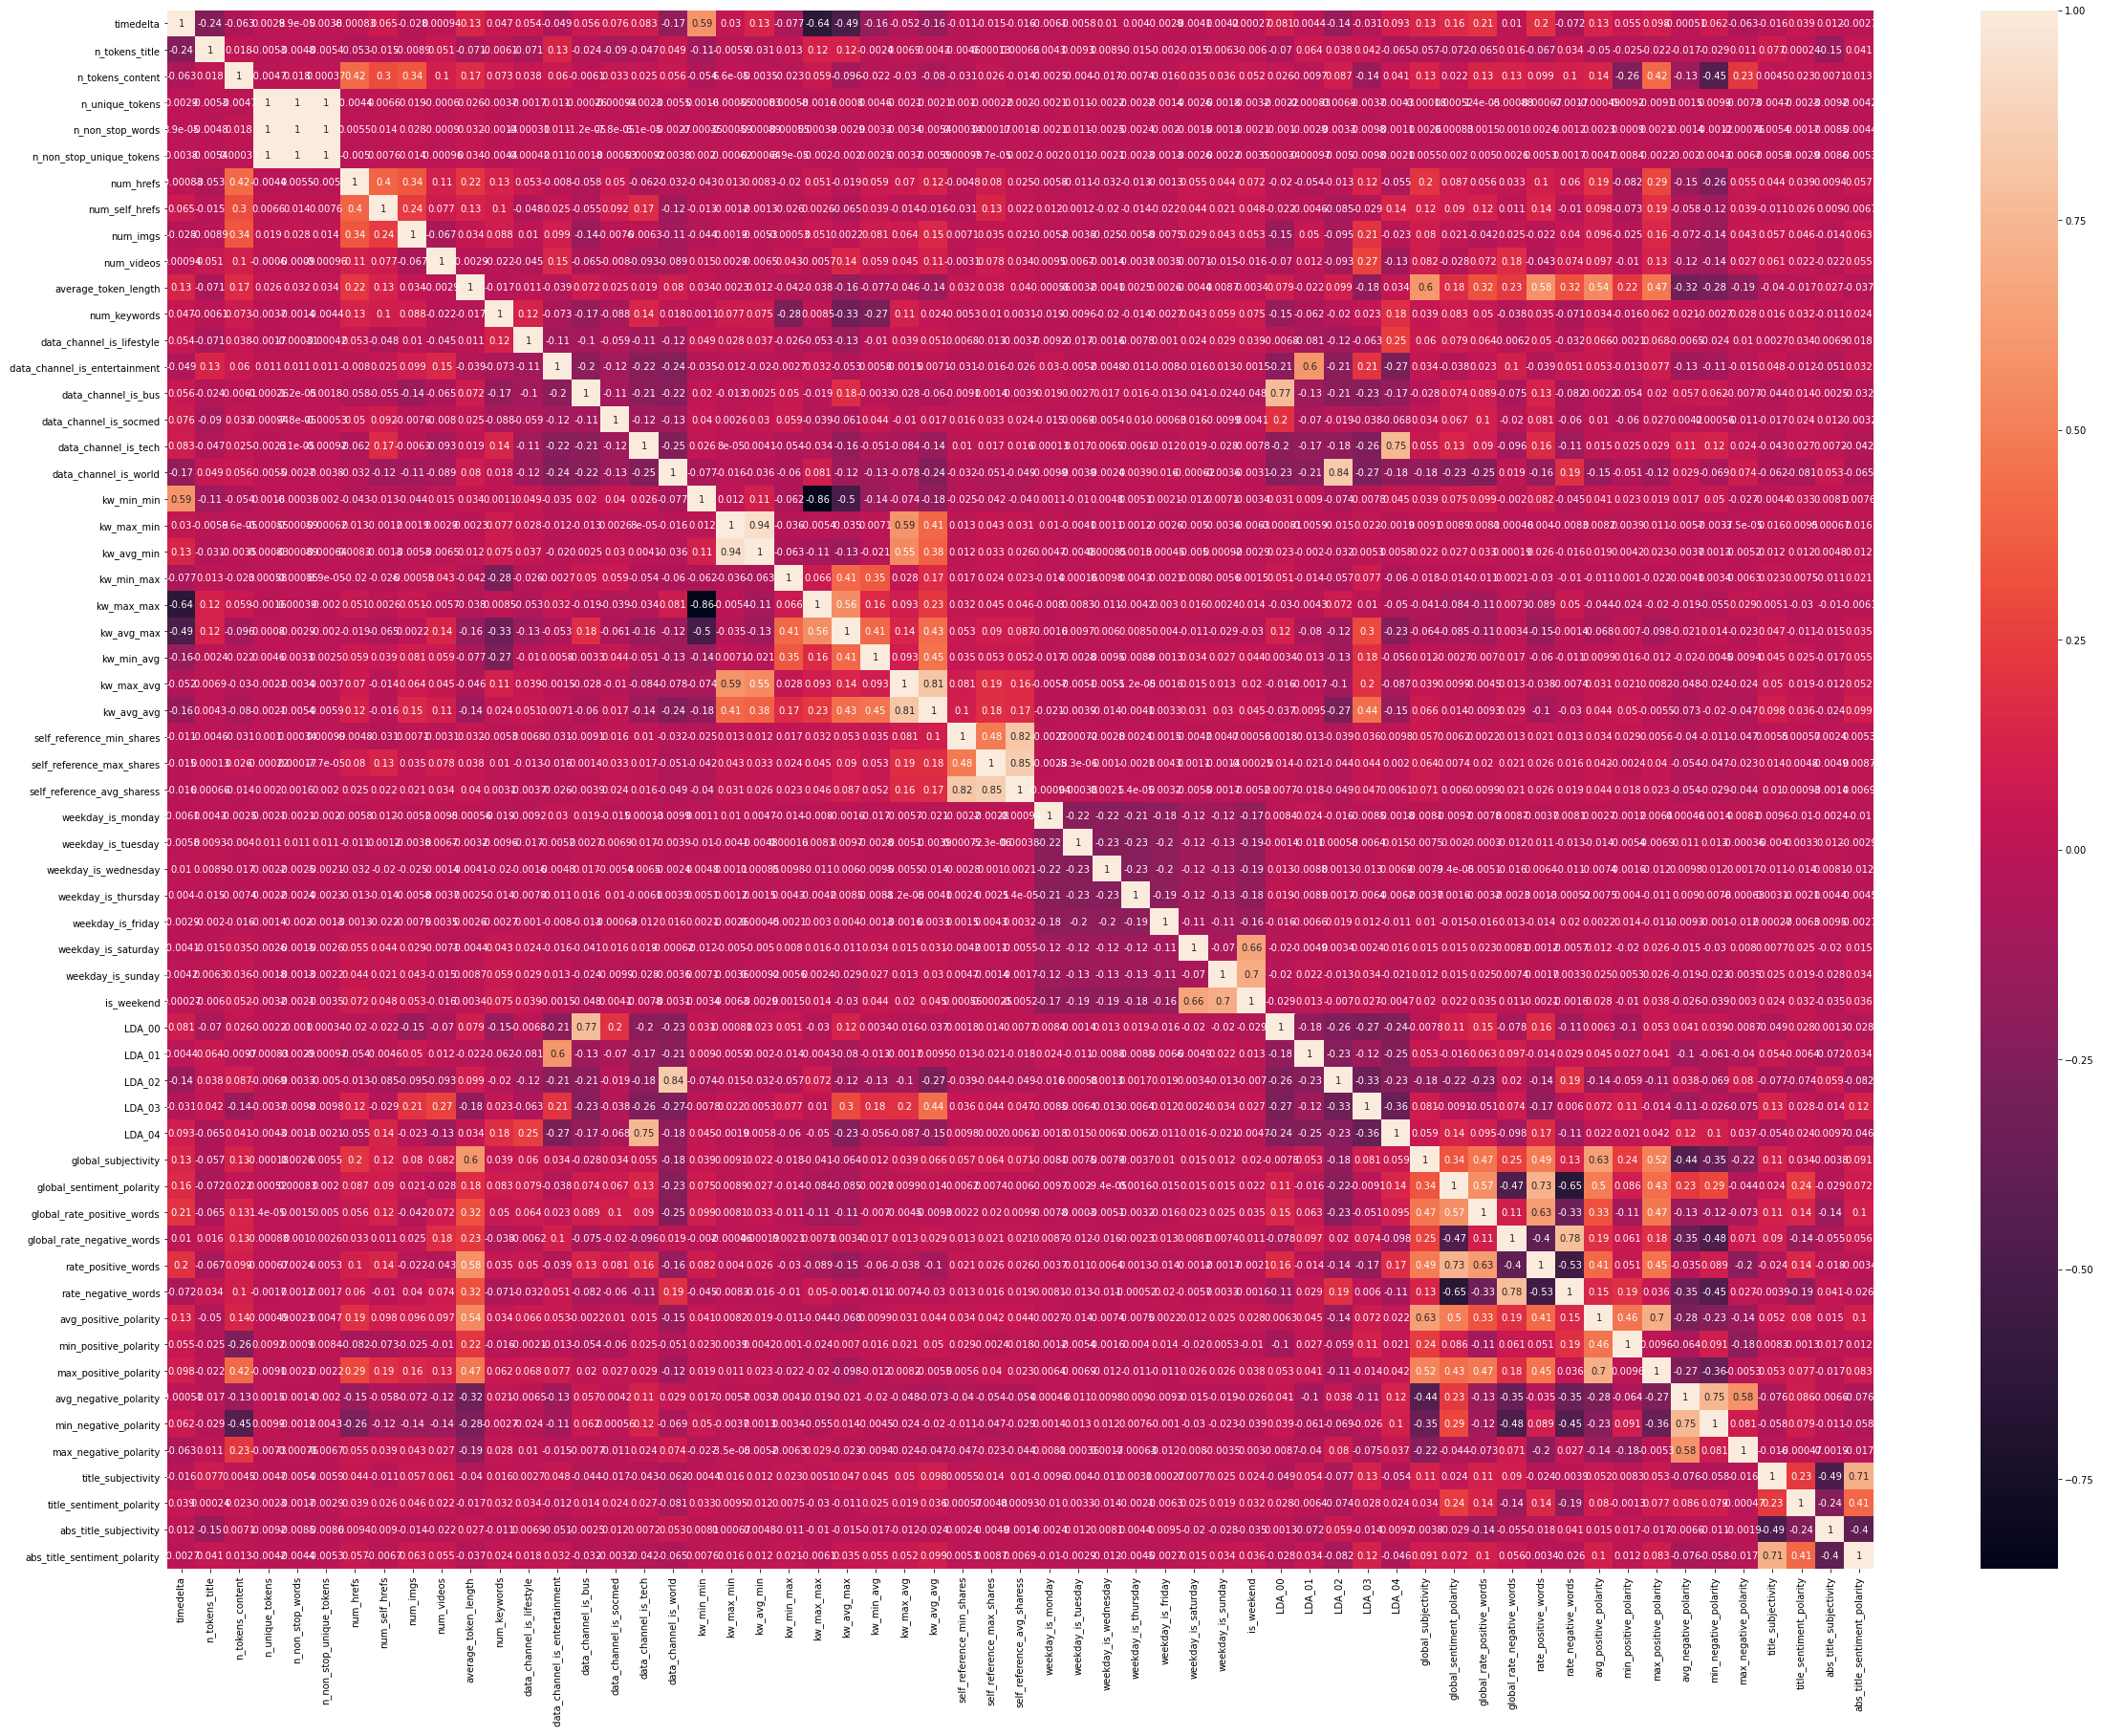

In [337]:
plt.figure(figsize=(40,30))
sns.heatmap(data=df_corr,annot=True)

##### Creating A New Dataset Without Correlated Features

In [338]:
def corr_news (dataset, threshold):
    col_corr = set()
    corr_matrix = df.iloc[:,0:-1].corr()
    for i in range (len(  corr_matrix.columns)):
        for j in range (i):
            if corr_matrix.iloc[i,j]> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


#### Defining a Threshold for Corr is 0.6

In [339]:
corr_news(df.iloc[:,0:-1],0.6)

{'LDA_00',
 'LDA_02',
 'LDA_04',
 'abs_title_sentiment_polarity',
 'avg_positive_polarity',
 'is_weekend',
 'kw_avg_avg',
 'kw_avg_min',
 'max_positive_polarity',
 'min_negative_polarity',
 'n_non_stop_unique_tokens',
 'n_non_stop_words',
 'rate_negative_words',
 'rate_positive_words',
 'self_reference_avg_sharess'}

In [340]:
corr_features = corr_news(df.iloc[:,0:-1],0.6)

##### Creating a New News Dataset By Removing the correlated features 

In [341]:
df_without_corr = df.drop(corr_features,axis=1)

In [342]:
df_without_corr.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
0,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000,593
1,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000,711
2,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000,1500
3,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000,1200
4,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455,505


### Data Visualization For Outliers Detection

In [343]:
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glo

In [344]:
df.columns[0:10]

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos'],
      dtype='object')

<AxesSubplot:xlabel='num_videos'>

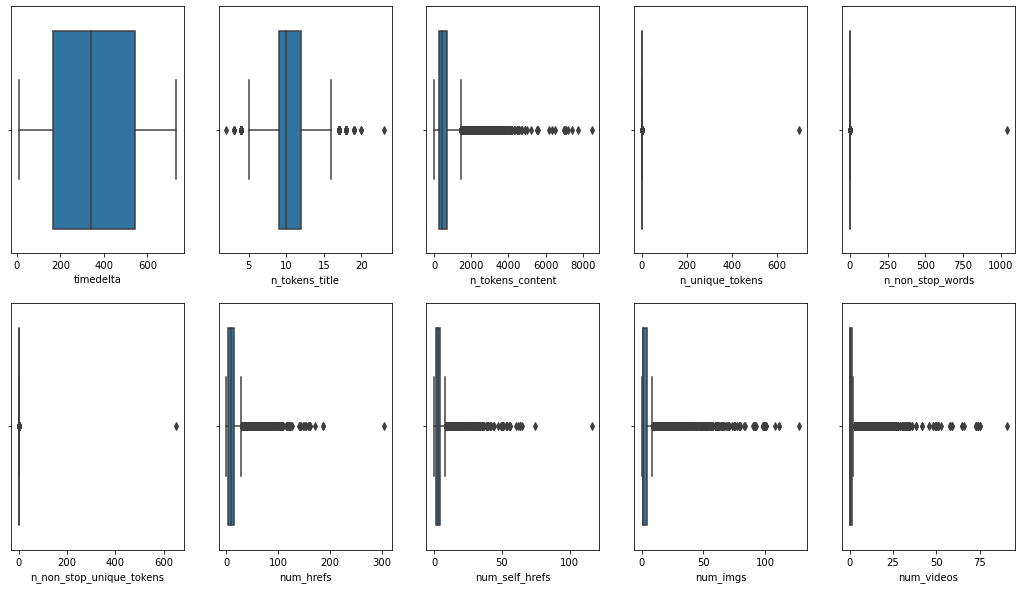

In [345]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='timedelta')
sns.boxplot(ax=axes[0, 1], data=df, x='n_tokens_title')
sns.boxplot(ax=axes[0, 2], data=df, x='n_tokens_content')
sns.boxplot(ax=axes[0, 3], data=df, x='n_unique_tokens')
sns.boxplot(ax=axes[0, 4], data=df, x='n_non_stop_words')
sns.boxplot(ax=axes[1, 0], data=df, x='n_non_stop_unique_tokens')
sns.boxplot(ax=axes[1, 1], data=df, x='num_hrefs')
sns.boxplot(ax=axes[1, 2], data=df, x='num_self_hrefs')
sns.boxplot(ax=axes[1, 3], data=df, x='num_imgs')
sns.boxplot(ax=axes[1, 4], data=df, x='num_videos')

In [346]:
#### From Above analysis we can say All the Nine features except timedelta are having otliers

In [347]:
df.columns[10:20]

Index(['average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min'],
      dtype='object')

<AxesSubplot:xlabel='kw_max_min'>

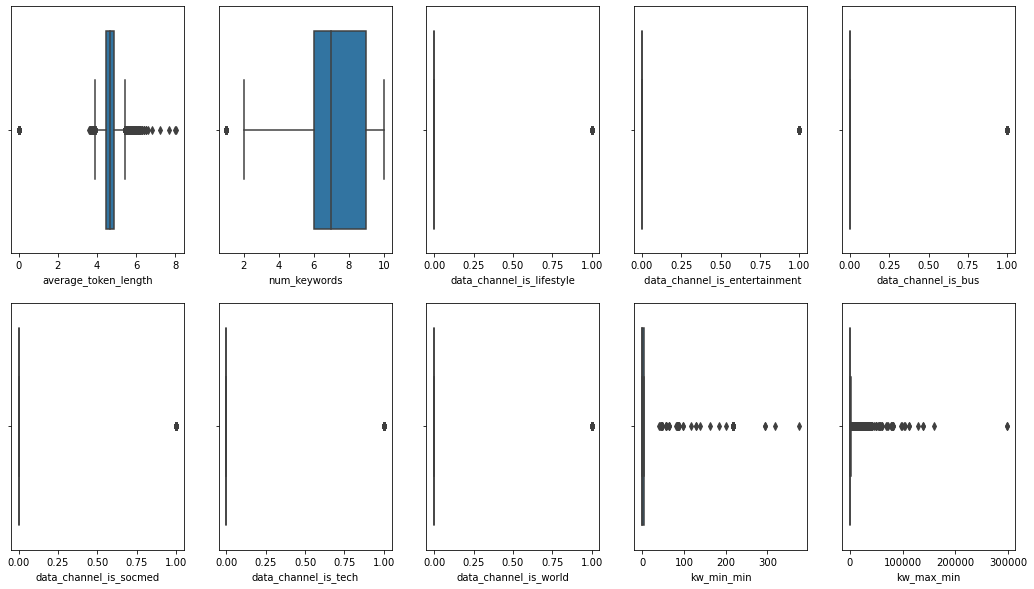

In [348]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='average_token_length')
sns.boxplot(ax=axes[0, 1], data=df, x='num_keywords')
sns.boxplot(ax=axes[0, 2], data=df, x='data_channel_is_lifestyle')
sns.boxplot(ax=axes[0, 3], data=df, x=' data_channel_is_entertainment')
sns.boxplot(ax=axes[0, 4], data=df, x='data_channel_is_bus')
sns.boxplot(ax=axes[1, 0], data=df, x='data_channel_is_socmed')
sns.boxplot(ax=axes[1, 1], data=df, x='data_channel_is_tech')
sns.boxplot(ax=axes[1, 2], data=df, x='data_channel_is_world')
sns.boxplot(ax=axes[1, 3], data=df, x='kw_min_min')
sns.boxplot(ax=axes[1, 4], data=df, x='kw_max_min')

In [349]:
#### From Above analysis we can say All the features are having otliers

In [350]:
###But here the data channel features are categorical data so we can't consider the outliers in that

In [351]:
df.columns[20:30]

Index(['kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess'],
      dtype='object')

<AxesSubplot:xlabel='self_reference_avg_sharess'>

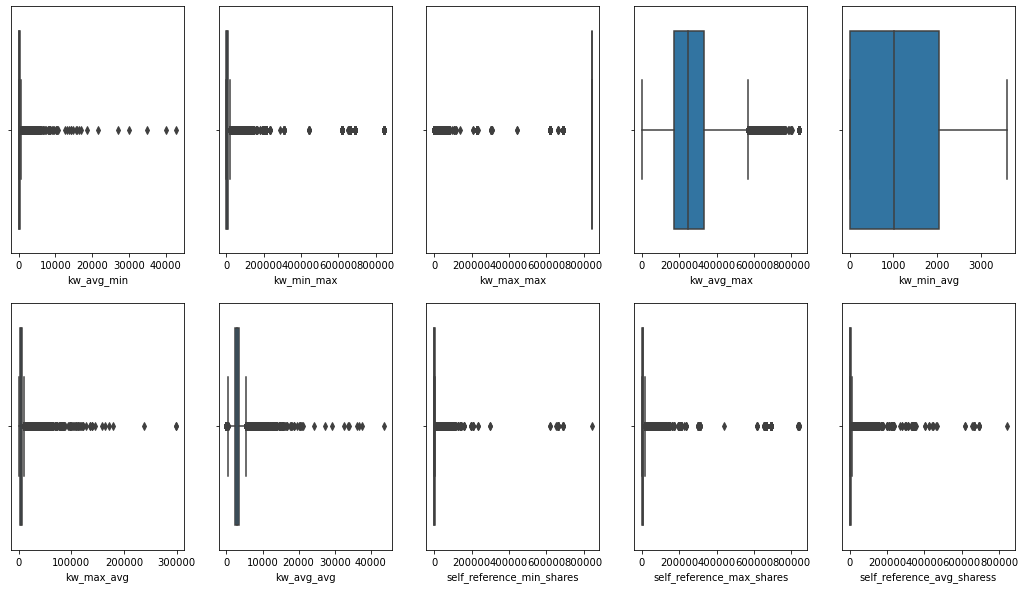

In [352]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='kw_avg_min')
sns.boxplot(ax=axes[0, 1], data=df, x='kw_min_max')
sns.boxplot(ax=axes[0, 2], data=df, x='kw_max_max')
sns.boxplot(ax=axes[0, 3], data=df, x='kw_avg_max')
sns.boxplot(ax=axes[0, 4], data=df, x='kw_min_avg')
sns.boxplot(ax=axes[1, 0], data=df, x='kw_max_avg')
sns.boxplot(ax=axes[1, 1], data=df, x='kw_avg_avg')
sns.boxplot(ax=axes[1, 2], data=df, x='self_reference_min_shares')
sns.boxplot(ax=axes[1, 3], data=df, x='self_reference_max_shares')
sns.boxplot(ax=axes[1, 4], data=df, x='self_reference_avg_sharess')

In [353]:
#### From Above analysis we can say All the features except kw_min_avg are having otliers

In [354]:
df.columns[30:40]

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01'],
      dtype='object')

<AxesSubplot:xlabel='LDA_01'>

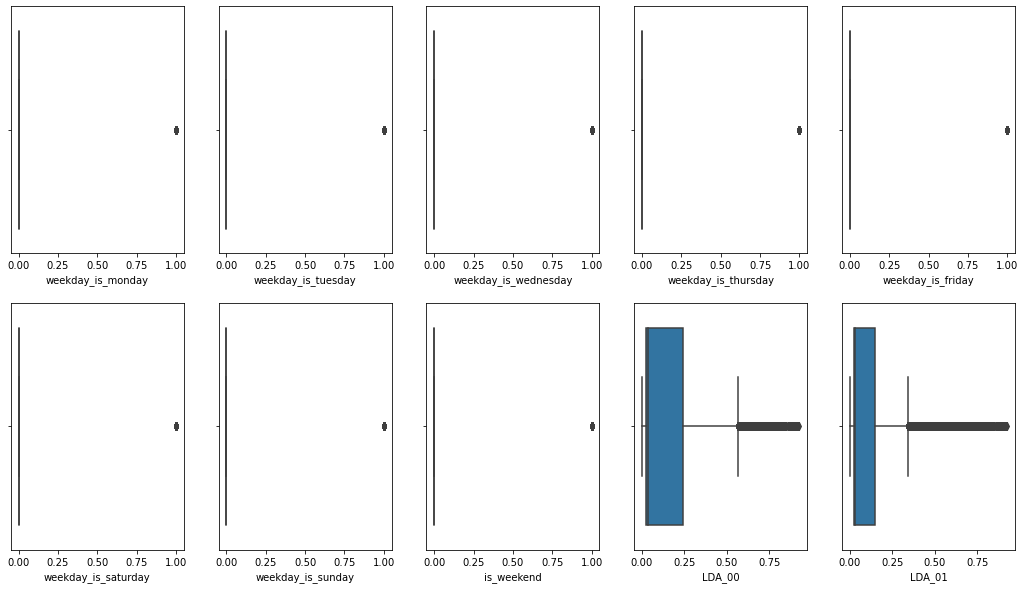

In [355]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='weekday_is_monday')
sns.boxplot(ax=axes[0, 1], data=df, x='weekday_is_tuesday')
sns.boxplot(ax=axes[0, 2], data=df, x='weekday_is_wednesday')
sns.boxplot(ax=axes[0, 3], data=df, x='weekday_is_thursday')
sns.boxplot(ax=axes[0, 4], data=df, x='weekday_is_friday')
sns.boxplot(ax=axes[1, 0], data=df, x='weekday_is_saturday')
sns.boxplot(ax=axes[1, 1], data=df, x='weekday_is_sunday')
sns.boxplot(ax=axes[1, 2], data=df, x='is_weekend')
sns.boxplot(ax=axes[1, 3], data=df, x='LDA_00')
sns.boxplot(ax=axes[1, 4], data=df, x='LDA_01')

In [356]:
#### From Above analysis we can say All the features are having otliers

In [357]:
###But here the weekdays and isweekend features are categorical data so we can't consider the outliers in that

In [358]:
df.columns[40:50]

Index(['LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity'],
      dtype='object')

<AxesSubplot:xlabel='avg_positive_polarity'>

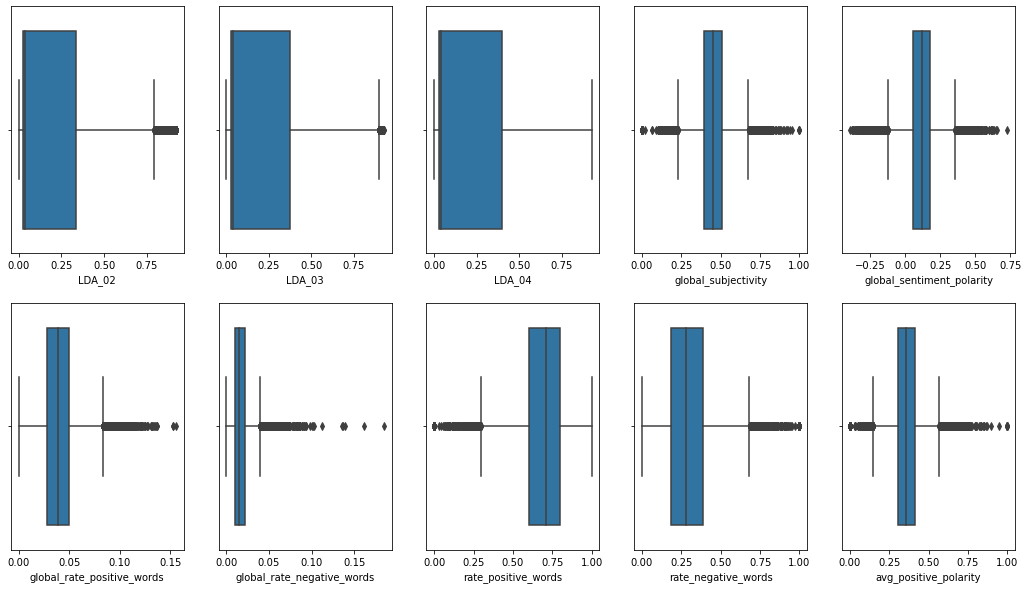

In [359]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='LDA_02')
sns.boxplot(ax=axes[0, 1], data=df, x='LDA_03')
sns.boxplot(ax=axes[0, 2], data=df, x='LDA_04')
sns.boxplot(ax=axes[0, 3], data=df, x='global_subjectivity')
sns.boxplot(ax=axes[0, 4], data=df, x='global_sentiment_polarity')
sns.boxplot(ax=axes[1, 0], data=df, x='global_rate_positive_words')
sns.boxplot(ax=axes[1, 1], data=df, x='global_rate_negative_words')
sns.boxplot(ax=axes[1, 2], data=df, x='rate_positive_words')
sns.boxplot(ax=axes[1, 3], data=df, x='rate_negative_words')
sns.boxplot(ax=axes[1, 4], data=df, x='avg_positive_polarity')

In [360]:
#### From Above analysis we can say All the features except (LDA_04) are having otliers

In [361]:
df.columns[50:60]

Index(['min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

<AxesSubplot:xlabel='abs_title_sentiment_polarity'>

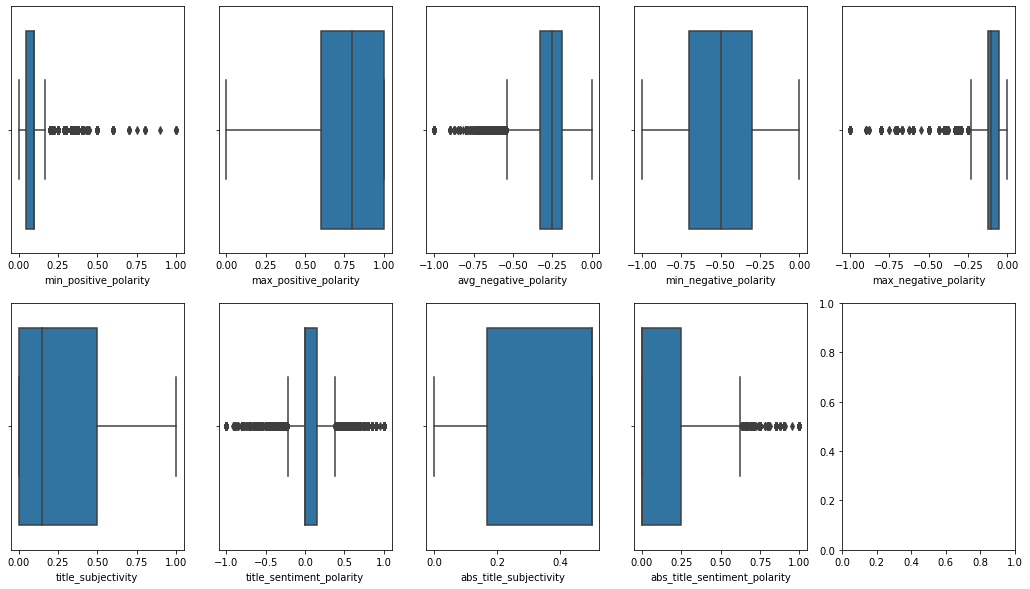

In [362]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='min_positive_polarity')
sns.boxplot(ax=axes[0, 1], data=df, x='max_positive_polarity')
sns.boxplot(ax=axes[0, 2], data=df, x='avg_negative_polarity')
sns.boxplot(ax=axes[0, 3], data=df, x='min_negative_polarity')
sns.boxplot(ax=axes[0, 4], data=df, x='max_negative_polarity')
sns.boxplot(ax=axes[1, 0], data=df, x='title_subjectivity')
sns.boxplot(ax=axes[1, 1], data=df, x='title_sentiment_polarity')
sns.boxplot(ax=axes[1, 2], data=df, x='abs_title_subjectivity')
sns.boxplot(ax=axes[1, 3], data=df, x='abs_title_sentiment_polarity')
#sns.boxplot(ax=axes[1, 4], data=df, x='avg_positive_polarity')

In [363]:
#### From Above analysis we can say All the features except (max_positive_polarity,min_negative_polarity,title_subjectivity, abs_title_subjectivity) are having otliers

In [364]:
##From above all the analysis we could say that our database is having outliers. so we need to handle the outliers. 

### Data Preprocessing Using Normalizer

In [365]:
from sklearn.preprocessing import Normalizer

In [366]:
nmr = Normalizer()

##### Normalizing The Whole Dataset

In [367]:
df.iloc[:,:-1] = nmr.fit_transform(df.iloc[:,:-1])

In [368]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.636112,0.010442,0.190573,0.000577,0.000870,0.000710,0.003481,0.001740,0.000870,0.0,...,0.000087,0.000609,-0.000305,-0.000522,-0.000174,0.000435,-0.000163,0.000000,0.000163,593
1,0.944091,0.011624,0.329334,0.000781,0.001292,0.001023,0.003875,0.001292,0.001292,0.0,...,0.000043,0.000904,-0.000153,-0.000161,-0.000129,0.000000,0.000000,0.000646,0.000000,711
2,0.414698,0.005106,0.119701,0.000326,0.000567,0.000377,0.001702,0.000567,0.000567,0.0,...,0.000057,0.000567,-0.000265,-0.000454,-0.000076,0.000000,0.000000,0.000284,0.000000,1500
3,0.808953,0.009960,0.587625,0.000558,0.001107,0.000737,0.009960,0.000000,0.001107,0.0,...,0.000151,0.000885,-0.000409,-0.000664,-0.000184,0.000000,0.000000,0.000553,0.000000,1200
4,0.044660,0.000794,0.065494,0.000025,0.000061,0.000033,0.001161,0.001161,0.001222,0.0,...,0.000002,0.000061,-0.000013,-0.000031,-0.000003,0.000028,0.000008,0.000003,0.000008,505


In [369]:
#Note: Here we used Normalizer as our data contains the outliers so that's why we are using Normalizer

#### Normalizing The Data Without Correlated Features

In [370]:
df_without_corr.iloc[:,:-1]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.521617,0.092562,0.045662,0.013699,0.100000,-0.350000,-0.200000,0.500000,-0.187500,0.000000
1,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.341246,0.148948,0.043137,0.015686,0.033333,-0.118750,-0.100000,0.000000,0.000000,0.500000
2,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.702222,0.323333,0.056872,0.009479,0.100000,-0.466667,-0.133333,0.000000,0.000000,0.500000
3,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.429850,0.100705,0.041431,0.020716,0.136364,-0.369697,-0.166667,0.000000,0.000000,0.500000
4,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.513502,0.281003,0.074627,0.012127,0.033333,-0.220192,-0.050000,0.454545,0.136364,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.482679,0.141964,0.037572,0.014451,0.100000,-0.260000,-0.125000,0.100000,0.000000,0.400000
39640,8.0,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.564374,0.194249,0.039634,0.009146,0.136364,-0.211111,-0.100000,0.300000,1.000000,0.200000
39641,8.0,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.510296,0.024609,0.033937,0.024887,0.136364,-0.356439,-0.166667,0.454545,0.136364,0.045455
39642,8.0,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.358578,-0.008066,0.020528,0.023460,0.062500,-0.205246,-0.012500,0.000000,0.000000,0.500000


In [371]:
df_without_corr.iloc[:,:-1] = nmr.fit_transform(df_without_corr.iloc[:,:-1])

In [372]:
df_without_corr.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
0,0.705180,0.011576,0.211265,0.000640,0.003859,0.001929,0.000965,0.0,0.004515,0.004823,...,0.000089,0.000044,1.321478e-05,0.000096,-0.000338,-0.000193,0.000482,-0.000181,0.000000,593
1,0.944094,0.011624,0.329335,0.000781,0.003875,0.001292,0.001292,0.0,0.006346,0.005166,...,0.000192,0.000056,2.025898e-05,0.000043,-0.000153,-0.000129,0.000000,0.000000,0.000646,711
2,0.485773,0.005981,0.140216,0.000382,0.001994,0.000665,0.000665,0.0,0.002920,0.003987,...,0.000215,0.000038,6.298878e-06,0.000066,-0.000310,-0.000089,0.000000,0.000000,0.000332,1500
3,0.808955,0.009960,0.587627,0.000558,0.009960,0.000000,0.001107,0.0,0.004875,0.007746,...,0.000111,0.000046,2.292477e-05,0.000151,-0.000409,-0.000184,0.000000,0.000000,0.000553,1200
4,0.045512,0.000809,0.066742,0.000026,0.001183,0.001183,0.001245,0.0,0.000292,0.000436,...,0.000017,0.000005,7.550121e-07,0.000002,-0.000014,-0.000003,0.000028,0.000008,0.000003,505


### Checking For Outliers After Normalizing the Data

<AxesSubplot:xlabel='abs_title_sentiment_polarity'>

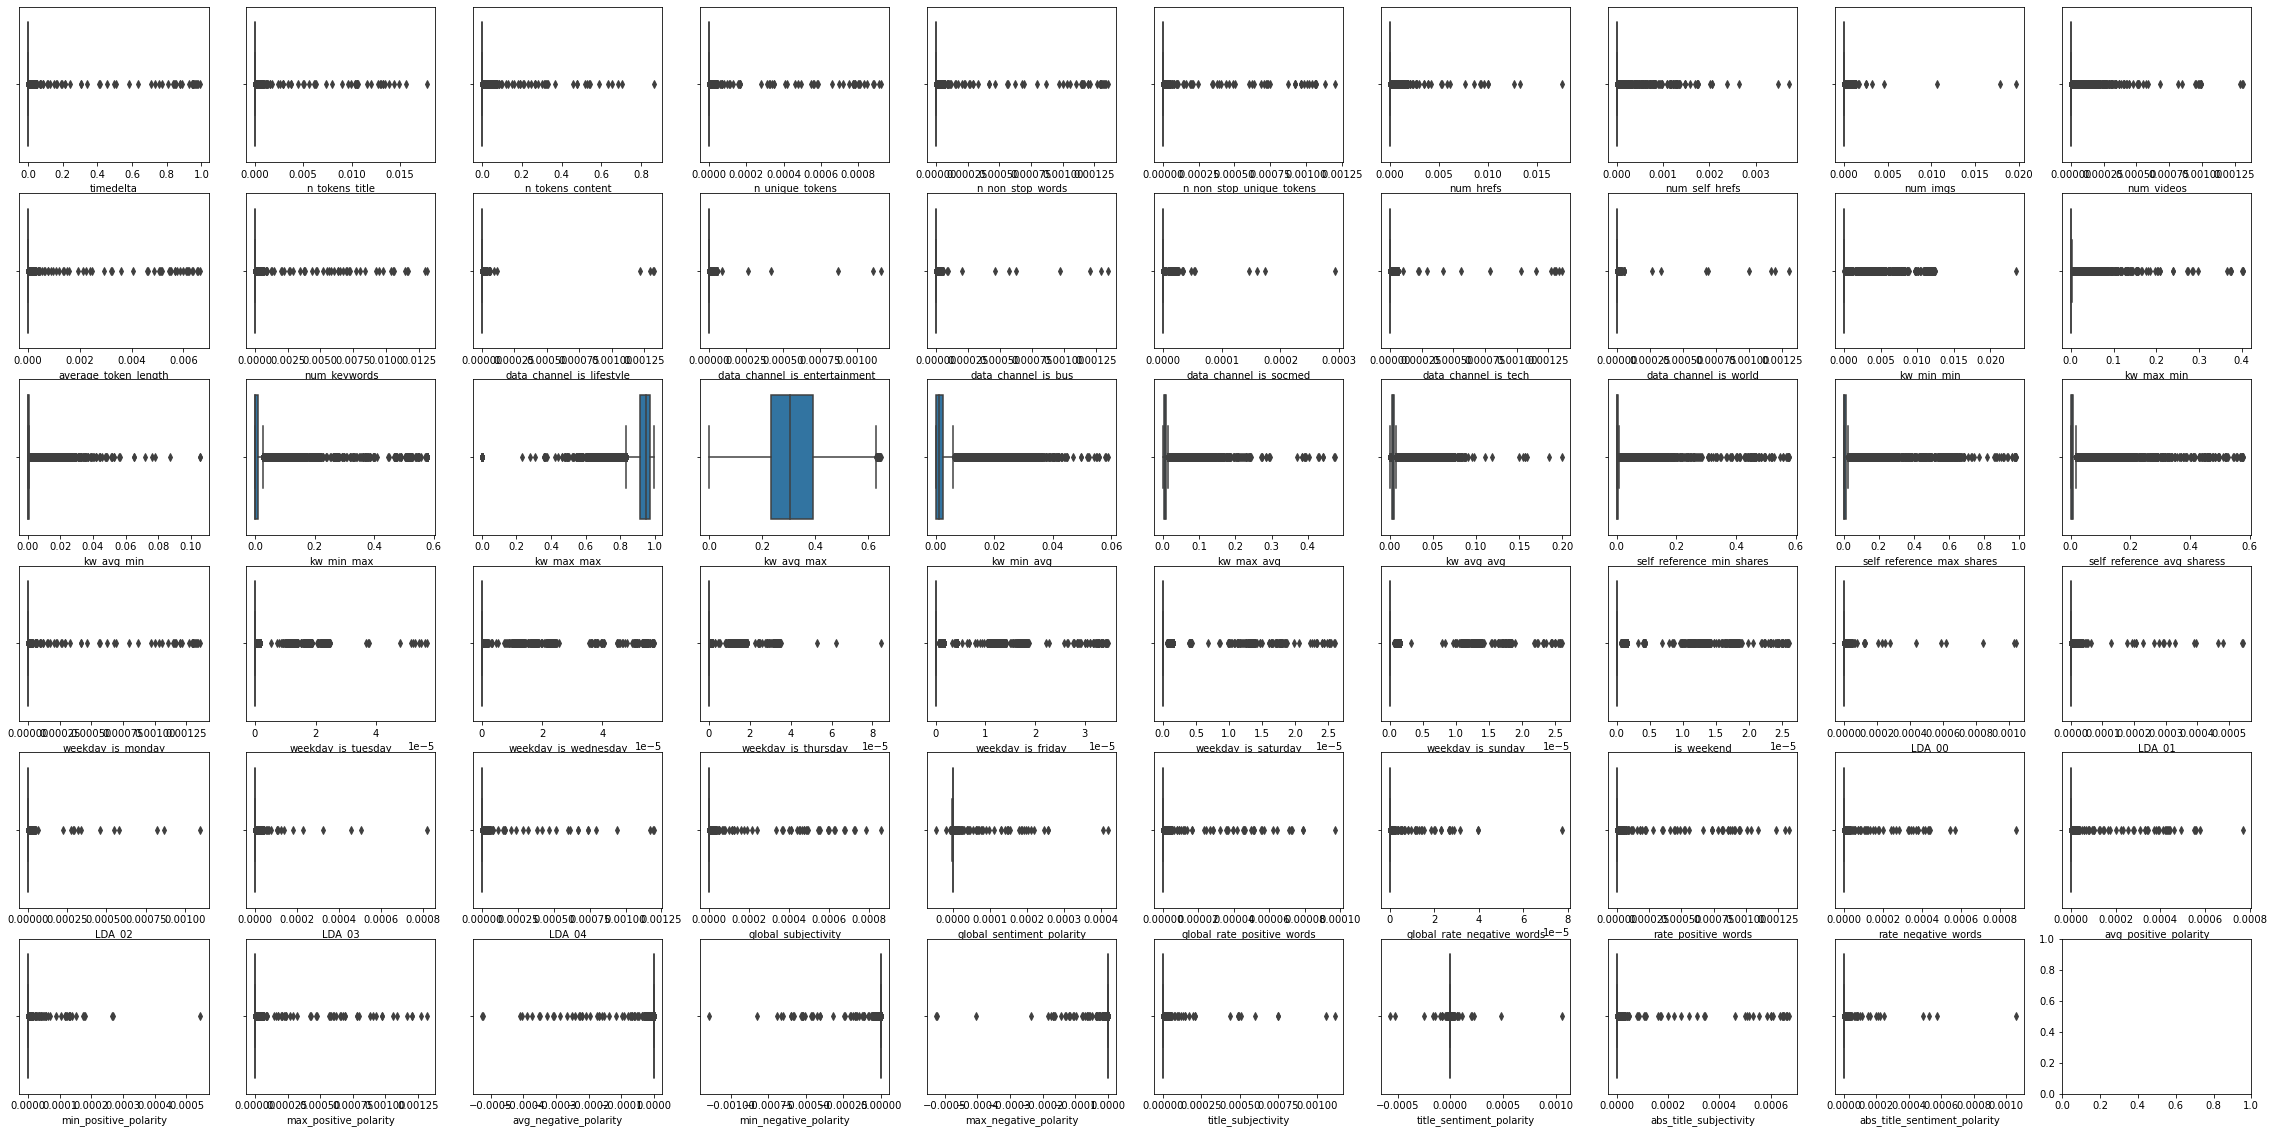

In [373]:
fig, axes = plt.subplots(6, 10, figsize=(40,20))
sns.boxplot(ax=axes[0, 0], data=df, x='timedelta')
sns.boxplot(ax=axes[0, 1], data=df, x='n_tokens_title')
sns.boxplot(ax=axes[0, 2], data=df, x='n_tokens_content')
sns.boxplot(ax=axes[0, 3], data=df, x='n_unique_tokens')
sns.boxplot(ax=axes[0, 4], data=df, x='n_non_stop_words')
sns.boxplot(ax=axes[0, 5], data=df, x='n_non_stop_unique_tokens')
sns.boxplot(ax=axes[0, 6], data=df, x='num_hrefs')
sns.boxplot(ax=axes[0, 7], data=df, x='num_self_hrefs')
sns.boxplot(ax=axes[0, 8], data=df, x='num_imgs')
sns.boxplot(ax=axes[0, 9], data=df, x='num_videos')


sns.boxplot(ax=axes[1, 0], data=df, x='average_token_length')
sns.boxplot(ax=axes[1, 1], data=df, x='num_keywords')
sns.boxplot(ax=axes[1, 2], data=df, x='data_channel_is_lifestyle')
sns.boxplot(ax=axes[1, 3], data=df, x=' data_channel_is_entertainment')
sns.boxplot(ax=axes[1, 4], data=df, x='data_channel_is_bus')
sns.boxplot(ax=axes[1, 5], data=df, x='data_channel_is_socmed')
sns.boxplot(ax=axes[1, 6], data=df, x='data_channel_is_tech')
sns.boxplot(ax=axes[1, 7], data=df, x='data_channel_is_world')
sns.boxplot(ax=axes[1, 8], data=df, x='kw_min_min')
sns.boxplot(ax=axes[1, 9], data=df, x='kw_max_min')


sns.boxplot(ax=axes[2, 0], data=df, x='kw_avg_min')
sns.boxplot(ax=axes[2, 1], data=df, x='kw_min_max')
sns.boxplot(ax=axes[2, 2], data=df, x='kw_max_max')
sns.boxplot(ax=axes[2, 3], data=df, x='kw_avg_max')
sns.boxplot(ax=axes[2, 4], data=df, x='kw_min_avg')
sns.boxplot(ax=axes[2, 5], data=df, x='kw_max_avg')
sns.boxplot(ax=axes[2, 6], data=df, x='kw_avg_avg')
sns.boxplot(ax=axes[2, 7], data=df, x='self_reference_min_shares')
sns.boxplot(ax=axes[2, 8], data=df, x='self_reference_max_shares')
sns.boxplot(ax=axes[2, 9], data=df, x='self_reference_avg_sharess')


sns.boxplot(ax=axes[3, 0], data=df, x='weekday_is_monday')
sns.boxplot(ax=axes[3, 1], data=df, x='weekday_is_tuesday')
sns.boxplot(ax=axes[3, 2], data=df, x='weekday_is_wednesday')
sns.boxplot(ax=axes[3, 3], data=df, x='weekday_is_thursday')
sns.boxplot(ax=axes[3, 4], data=df, x='weekday_is_friday')
sns.boxplot(ax=axes[3, 5], data=df, x='weekday_is_saturday')
sns.boxplot(ax=axes[3, 6], data=df, x='weekday_is_sunday')
sns.boxplot(ax=axes[3, 7], data=df, x='is_weekend')
sns.boxplot(ax=axes[3, 8], data=df, x='LDA_00')
sns.boxplot(ax=axes[3, 9], data=df, x='LDA_01')

sns.boxplot(ax=axes[4, 0], data=df, x='LDA_02')
sns.boxplot(ax=axes[4, 1], data=df, x='LDA_03')
sns.boxplot(ax=axes[4, 2], data=df, x='LDA_04')
sns.boxplot(ax=axes[4, 3], data=df, x='global_subjectivity')
sns.boxplot(ax=axes[4, 4], data=df, x='global_sentiment_polarity')
sns.boxplot(ax=axes[4, 5], data=df, x='global_rate_positive_words')
sns.boxplot(ax=axes[4, 6], data=df, x='global_rate_negative_words')
sns.boxplot(ax=axes[4, 7], data=df, x='rate_positive_words')
sns.boxplot(ax=axes[4, 8], data=df, x='rate_negative_words')
sns.boxplot(ax=axes[4, 9], data=df, x='avg_positive_polarity')

sns.boxplot(ax=axes[5, 0], data=df, x='min_positive_polarity')
sns.boxplot(ax=axes[5, 1], data=df, x='max_positive_polarity')
sns.boxplot(ax=axes[5, 2], data=df, x='avg_negative_polarity')
sns.boxplot(ax=axes[5, 3], data=df, x='min_negative_polarity')
sns.boxplot(ax=axes[5, 4], data=df, x='max_negative_polarity')
sns.boxplot(ax=axes[5, 5], data=df, x='title_subjectivity')
sns.boxplot(ax=axes[5, 6], data=df, x='title_sentiment_polarity')
sns.boxplot(ax=axes[5, 7], data=df, x='abs_title_subjectivity')
sns.boxplot(ax=axes[5, 8], data=df, x='abs_title_sentiment_polarity')

### Handelling Outliers

#### Outliers Handelling For Whole Dataset

#### Log Transformation for Ouliers Handelling

In [374]:
df_log = np.log10(df.iloc[:,:-1])

<ipython-input-374-ff444d0b8fd3>:1: RuntimeWarning: divide by zero encountered in log10
  df_log = np.log10(df.iloc[:,:-1])
<ipython-input-374-ff444d0b8fd3>:1: RuntimeWarning: invalid value encountered in log10
  df_log = np.log10(df.iloc[:,:-1])


In [375]:
df_log.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.196466,-1.981203,-0.719940,-3.238481,-3.060384,-3.149021,-2.458324,-2.759354,-3.060384,-inf,...,-3.482161,-4.060384,-3.215286,NaN,NaN,NaN,-3.361414,NaN,-inf,-3.787383
1,-0.024986,-1.934661,-0.482363,-3.107333,-2.888903,-2.990208,-2.411782,-2.888903,-2.888903,-inf,...,-3.431151,-4.366025,-3.043805,NaN,NaN,NaN,-inf,-inf,-3.189933,-inf
2,-0.382268,-2.291943,-0.921903,-3.486420,-3.246185,-3.424105,-2.769064,-3.246185,-3.246185,-inf,...,-3.550850,-4.246185,-3.246185,NaN,NaN,NaN,-inf,-inf,-3.547215,-inf
3,-0.092077,-2.001752,-0.230899,-3.253746,-2.955994,-3.132758,-2.001752,-inf,-2.955994,-inf,...,-3.369446,-3.821295,-3.052904,NaN,NaN,NaN,-inf,-inf,-3.257024,-inf
4,-1.350078,-3.100053,-1.183801,-4.595273,-4.213996,-4.480887,-2.935242,-2.935242,-2.912966,-inf,...,-4.600019,-5.691117,-4.213996,NaN,NaN,NaN,-4.556419,-5.079297,-5.556419,-5.079297


#### As we can see here our data is getting converted into infinity values so we can't use this approach here

#### Removing Outliers

In [376]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

timedelta                         4.385238e-04
n_tokens_title                    4.028449e-06
n_tokens_content                  6.902243e-04
n_unique_tokens                   2.036855e-07
n_non_stop_words                  6.741109e-08
n_non_stop_unique_tokens          2.100098e-07
num_hrefs                         1.375694e-05
num_self_hrefs                    4.487789e-06
num_imgs                          7.794691e-06
num_videos                        1.132025e-06
average_token_length              8.570938e-07
num_keywords                      4.350482e-06
data_channel_is_lifestyle         0.000000e+00
 data_channel_is_entertainment    0.000000e+00
data_channel_is_bus               0.000000e+00
data_channel_is_socmed            0.000000e+00
data_channel_is_tech              0.000000e+00
data_channel_is_world             0.000000e+00
kw_min_min                        5.804059e-06
kw_max_min                        8.990067e-04
kw_avg_min                        3.169916e-04
kw_min_max   

In [377]:
df1 = df.drop(['data_channel_is_lifestyle',' data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend'],axis=1)

In [378]:
df1.shape

(39644, 46)

In [379]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [380]:
df2.shape

(10588, 46)

#### The Whole Dataset

In [382]:
df.head() #after Normalization

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.636112,0.010442,0.190573,0.000577,0.000870,0.000710,0.003481,0.001740,0.000870,0.0,...,0.000087,0.000609,-0.000305,-0.000522,-0.000174,0.000435,-0.000163,0.000000,0.000163,593
1,0.944091,0.011624,0.329334,0.000781,0.001292,0.001023,0.003875,0.001292,0.001292,0.0,...,0.000043,0.000904,-0.000153,-0.000161,-0.000129,0.000000,0.000000,0.000646,0.000000,711
2,0.414698,0.005106,0.119701,0.000326,0.000567,0.000377,0.001702,0.000567,0.000567,0.0,...,0.000057,0.000567,-0.000265,-0.000454,-0.000076,0.000000,0.000000,0.000284,0.000000,1500
3,0.808953,0.009960,0.587625,0.000558,0.001107,0.000737,0.009960,0.000000,0.001107,0.0,...,0.000151,0.000885,-0.000409,-0.000664,-0.000184,0.000000,0.000000,0.000553,0.000000,1200
4,0.044660,0.000794,0.065494,0.000025,0.000061,0.000033,0.001161,0.001161,0.001222,0.0,...,0.000002,0.000061,-0.000013,-0.000031,-0.000003,0.000028,0.000008,0.000003,0.000008,505


#### Dataset Withour Correlated Feaures

In [383]:
df_without_corr.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares
0,0.705180,0.011576,0.211265,0.000640,0.003859,0.001929,0.000965,0.0,0.004515,0.004823,...,0.000089,0.000044,1.321478e-05,0.000096,-0.000338,-0.000193,0.000482,-0.000181,0.000000,593
1,0.944094,0.011624,0.329335,0.000781,0.003875,0.001292,0.001292,0.0,0.006346,0.005166,...,0.000192,0.000056,2.025898e-05,0.000043,-0.000153,-0.000129,0.000000,0.000000,0.000646,711
2,0.485773,0.005981,0.140216,0.000382,0.001994,0.000665,0.000665,0.0,0.002920,0.003987,...,0.000215,0.000038,6.298878e-06,0.000066,-0.000310,-0.000089,0.000000,0.000000,0.000332,1500
3,0.808955,0.009960,0.587627,0.000558,0.009960,0.000000,0.001107,0.0,0.004875,0.007746,...,0.000111,0.000046,2.292477e-05,0.000151,-0.000409,-0.000184,0.000000,0.000000,0.000553,1200
4,0.045512,0.000809,0.066742,0.000026,0.001183,0.001183,0.001245,0.0,0.000292,0.000436,...,0.000017,0.000005,7.550121e-07,0.000002,-0.000014,-0.000003,0.000028,0.000008,0.000003,505


#### Dataset After Removing The Outliers

In [384]:
df2.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
5437,0.000786,0.000012,0.000185,8.679875e-07,0.000001,9.975803e-07,0.000005,0.000001,0.000000,0.000000,...,1.695762e-07,9.948472e-07,-4.007023e-07,-7.461354e-07,-2.072598e-07,0.0,0.0,6.217795e-07,0.0,631
5484,0.000796,0.000010,0.000192,9.713578e-07,0.000001,1.112674e-06,0.000005,0.000001,0.000000,0.000000,...,1.261935e-07,6.309675e-07,-6.817954e-07,-1.009548e-06,-1.577419e-07,0.0,0.0,6.309675e-07,0.0,2200
5595,0.000772,0.000015,0.000217,7.890464e-07,0.000001,9.564364e-07,0.000007,0.000002,0.000000,0.000001,...,1.670589e-07,8.575688e-07,-2.887732e-07,-4.900393e-07,-8.750702e-08,0.0,0.0,6.125492e-07,0.0,1900
5986,0.000767,0.000015,0.000380,7.172394e-07,0.000001,8.280488e-07,0.000022,0.000002,0.000016,0.000001,...,1.681373e-07,1.048056e-06,-4.276993e-07,-4.932028e-07,-2.311888e-07,0.0,0.0,6.165035e-07,0.0,1200
6066,0.000756,0.000012,0.000108,1.027315e-06,0.000001,1.179545e-06,0.000005,0.000004,0.000000,0.000001,...,1.665915e-07,4.072238e-07,-1.900378e-07,-1.900378e-07,-1.900378e-07,0.0,0.0,6.108357e-07,0.0,2600


### Model Building For All Types of Data

#### Model For Whole Dataset

#### Linear Regression 

In [388]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.636112,0.010442,0.190573,0.000577,0.000870,0.000710,0.003481,0.001740,0.000870,0.0,...,0.000087,0.000609,-0.000305,-0.000522,-0.000174,0.000435,-0.000163,0.000000,0.000163,593
1,0.944091,0.011624,0.329334,0.000781,0.001292,0.001023,0.003875,0.001292,0.001292,0.0,...,0.000043,0.000904,-0.000153,-0.000161,-0.000129,0.000000,0.000000,0.000646,0.000000,711
2,0.414698,0.005106,0.119701,0.000326,0.000567,0.000377,0.001702,0.000567,0.000567,0.0,...,0.000057,0.000567,-0.000265,-0.000454,-0.000076,0.000000,0.000000,0.000284,0.000000,1500
3,0.808953,0.009960,0.587625,0.000558,0.001107,0.000737,0.009960,0.000000,0.001107,0.0,...,0.000151,0.000885,-0.000409,-0.000664,-0.000184,0.000000,0.000000,0.000553,0.000000,1200
4,0.044660,0.000794,0.065494,0.000025,0.000061,0.000033,0.001161,0.001161,0.001222,0.0,...,0.000002,0.000061,-0.000013,-0.000031,-0.000003,0.000028,0.000008,0.000003,0.000008,505


In [396]:
X = df.iloc[:,:-1]

In [397]:
y = df.iloc[:,-1]

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [400]:
from sklearn.linear_model import LinearRegression

In [401]:
lr = LinearRegression()

In [402]:
lr = lr.fit(X_train,y_train)

In [403]:
y_lr = lr.predict(X_test)

In [404]:
r2_score(y_test,y_lr)

0.009225386004066194

#### DecisionTree Regression

In [405]:
from sklearn.tree import DecisionTreeRegressor

In [406]:
dt = DecisionTreeRegressor()

In [408]:
dt = dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
r2_score(y_test,y_dt)

-2.037012451481433

### Feature Selection on The Basis of Probality value

In [271]:
##Note : Here we are selecting those features whose values is less than or equal to 0.05

In [425]:
import statsmodels.regression.linear_model as sm

In [426]:
X = df.iloc[:,:-1]

In [427]:
y = df.iloc[:,-1]

In [428]:
ols = sm.OLS(endog=y,exog=X).fit()

In [429]:
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 shares   R-squared (uncentered):                   0.086
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              64.33
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                        0.00
Time:                        00:02:49   Log-Likelihood:                     -4.2720e+05
No. Observations:               39644   AIC:                                  8.545e+05
Df Residuals:                   39586   BIC:                                  8.550e+05
Df Model:                          58                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

#### Selcting Features Based on the Pvalue

##### Removed Features Which is having Pvalue more that 0.05

In [454]:
X_with_selected_Features = df.drop(['n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','num_imgs','num_videos','average_token_length','num_keywords','data_channel_is_lifestyle',' data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','kw_max_min','kw_avg_min','kw_min_avg','kw_avg_avg','self_reference_max_shares','self_reference_avg_sharess','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity'],axis=1)

In [455]:
X_with_selected_Features.shape

(39644, 11)

In [456]:
y = df.iloc[:,-1]

In [457]:
y.shape

(39644,)

In [458]:
import statsmodels.regression.linear_model as sm
ols = sm.OLS(endog=y,exog=X_with_selected_Features).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 shares   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.527e+33
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                        0.00
Time:                        00:39:29   Log-Likelihood:                      9.2325e+05
No. Observations:               39644   AIC:                                 -1.846e+06
Df Residuals:                   39633   BIC:                                 -1.846e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

#### From above analysis we can say that we have selected the topmost features which are really affecting in number of shares for Article

### Model Building For Selected Features

## Linear Regression

In [459]:
X_with_selected_Features.head()

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
0,0.636112,0.010442,0.003481,0.001740,0.0,0.0,0.0,0.0,0.0,0.431616,593
1,0.944091,0.011624,0.003875,0.001292,0.0,0.0,0.0,0.0,0.0,0.000000,711
2,0.414698,0.005106,0.001702,0.000567,0.0,0.0,0.0,0.0,0.0,0.520784,1500
3,0.808953,0.009960,0.009960,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1200
4,0.044660,0.000794,0.001161,0.001161,0.0,0.0,0.0,0.0,0.0,0.033297,505


In [460]:
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [461]:
from sklearn.model_selection import train_test_split

In [462]:
X_train_wsf, X_test_wsf, y_train_wsf, y_test_wsf = train_test_split(X_with_selected_Features, y, test_size=0.20, random_state=42)

In [463]:
X_train_wsf

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
19837,0.000373,0.000017,0.000015,0.000001,-0.000001,0.008379,0.929737,0.368030,0.006976,0.000813,16100
904,0.012308,0.000189,0.000034,0.000000,0.003735,0.015905,0.893393,0.444218,0.047264,0.000000,508
23876,0.000288,0.000008,0.000005,0.000002,-0.000001,0.007919,0.927505,0.373422,0.004495,0.008029,1300
22966,0.000307,0.000012,0.000009,0.000002,-0.000001,0.000000,0.927281,0.374299,0.006128,0.000000,3100
4705,0.001008,0.000020,0.000005,0.000000,0.000338,0.000000,0.962985,0.269461,0.005256,0.000000,6900
...,...,...,...,...,...,...,...,...,...,...,...
6265,0.000874,0.000011,0.000004,0.000000,0.000006,0.000000,0.979505,0.201321,0.004972,0.000000,3700
11284,0.000581,0.000012,0.000016,0.000002,0.000005,0.015657,0.949912,0.311987,0.005823,0.002703,492
38158,0.000040,0.000013,0.000006,0.000003,-0.000001,0.000000,0.972002,0.234792,0.005183,0.000997,1100
860,0.012473,0.000122,0.000070,0.000052,0.003780,0.000000,0.904092,0.416335,0.071624,0.016584,1500


In [465]:
y_train_wsf

19837    16100
904        508
23876     1300
22966     3100
4705      6900
         ...  
6265      3700
11284      492
38158     1100
860       1500
15795      829
Name: shares, Length: 31715, dtype: int64

In [467]:
from sklearn.linear_model import LinearRegression
lr_wsf = LinearRegression()
lr_wsf = lr_wsf.fit(X_train_wsf,y_train_wsf)
y_wsf = lr_wsf.predict(X_test_wsf)
print(r2_score(y_test_wsf,y_wsf))

1.0


## Decision Tree Regression

In [469]:
X_with_selected_Features.head()

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
0,0.636112,0.010442,0.003481,0.001740,0.0,0.0,0.0,0.0,0.0,0.431616,593
1,0.944091,0.011624,0.003875,0.001292,0.0,0.0,0.0,0.0,0.0,0.000000,711
2,0.414698,0.005106,0.001702,0.000567,0.0,0.0,0.0,0.0,0.0,0.520784,1500
3,0.808953,0.009960,0.009960,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1200
4,0.044660,0.000794,0.001161,0.001161,0.0,0.0,0.0,0.0,0.0,0.033297,505


In [470]:
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [471]:
from sklearn.model_selection import train_test_split
X_train_wsf, X_test_wsf, y_train_wsf, y_test_wsf = train_test_split(X_with_selected_Features, y, test_size=0.20, random_state=42)

In [472]:
from sklearn.tree import DecisionTreeRegressor
dtr_wsf = DecisionTreeRegressor()
dtr_wsf = dtr_wsf.fit(X_train_wsf,y_train_wsf)
y_wsf = dtr_wsf.predict(X_test_wsf)
print(r2_score(y_test_wsf,y_wsf))

0.9990765948545434


## RandomForest Regression 

In [476]:
X_with_selected_Features.head()

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
0,0.636112,0.010442,0.003481,0.001740,0.0,0.0,0.0,0.0,0.0,0.431616,593
1,0.944091,0.011624,0.003875,0.001292,0.0,0.0,0.0,0.0,0.0,0.000000,711
2,0.414698,0.005106,0.001702,0.000567,0.0,0.0,0.0,0.0,0.0,0.520784,1500
3,0.808953,0.009960,0.009960,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1200
4,0.044660,0.000794,0.001161,0.001161,0.0,0.0,0.0,0.0,0.0,0.033297,505


In [477]:
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [487]:
from sklearn.model_selection import train_test_split
X_train_wsf, X_test_wsf, y_train_wsf, y_test_wsf = train_test_split(X_with_selected_Features, y, test_size=0.20, random_state=42)

In [491]:
from sklearn.ensemble import RandomForestRegressor
rfr_wsf = RandomForestRegressor()
rfr_wsf = rfr_wsf.fit(X_train_wsf,y_train_wsf)
y_wsf = rfr_wsf.predict(X_test_wsf)
print(r2_score(y_test_wsf,y_wsf))

0.9999078651031397


## KNN Regressor

In [492]:
X_with_selected_Features.head()

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
0,0.636112,0.010442,0.003481,0.001740,0.0,0.0,0.0,0.0,0.0,0.431616,593
1,0.944091,0.011624,0.003875,0.001292,0.0,0.0,0.0,0.0,0.0,0.000000,711
2,0.414698,0.005106,0.001702,0.000567,0.0,0.0,0.0,0.0,0.0,0.520784,1500
3,0.808953,0.009960,0.009960,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1200
4,0.044660,0.000794,0.001161,0.001161,0.0,0.0,0.0,0.0,0.0,0.033297,505


In [493]:
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [494]:
from sklearn.model_selection import train_test_split
X_train_wsf, X_test_wsf, y_train_wsf, y_test_wsf = train_test_split(X_with_selected_Features, y, test_size=0.20, random_state=42)

In [495]:
from sklearn.neighbors import KNeighborsRegressor
knr_wsf = KNeighborsRegressor()
knr_wsf = knr_wsf.fit(X_train_wsf,y_train_wsf)
y_wsf = knr_wsf.predict(X_test_wsf)
print(r2_score(y_test_wsf,y_wsf))

0.9949970058997439


## Support Vector Machine Regression

In [497]:
X_with_selected_Features.head()

,timedelta,n_tokens_title,num_hrefs,num_self_hrefs,kw_min_min,kw_min_max,kw_max_max,kw_avg_max,kw_max_avg,self_reference_min_shares,shares
0,0.636112,0.010442,0.003481,0.001740,0.0,0.0,0.0,0.0,0.0,0.431616,593
1,0.944091,0.011624,0.003875,0.001292,0.0,0.0,0.0,0.0,0.0,0.000000,711
2,0.414698,0.005106,0.001702,0.000567,0.0,0.0,0.0,0.0,0.0,0.520784,1500
3,0.808953,0.009960,0.009960,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1200
4,0.044660,0.000794,0.001161,0.001161,0.0,0.0,0.0,0.0,0.0,0.033297,505


In [498]:
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [503]:
from sklearn.model_selection import train_test_split
X_train_wsf, X_test_wsf, y_train_wsf, y_test_wsf = train_test_split(X_with_selected_Features, y, test_size=0.20, random_state=42)

In [504]:
from sklearn.svm import SVR
svr_wsf = SVR()
svr_wsf = svr_wsf.fit(X_train_wsf,y_train_wsf)
y_wsf = svr_wsf.predict(X_test_wsf)
print(r2_score(y_test_wsf,y_wsf))

0.049925270501107843


## Conclusion

#### From The all above analysis we can say that there are only 10 features that are impacting the Number of Shares for Article.

#### If We try to focus on that 10 features then automatically the shares for architects will increase.

#### As the company will get benefit from number of shares for architects so they need to focus on this 10 features and they will 100% get benefit after that.